In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [40]:
df_train = pd.read_csv('train.csv')
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [41]:
# Build list with unique labels
label_list = []
for tag_str in df_train.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)
# Add onehot features for every label
for label in label_list:
    df_train[label] = df_train['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
df_train.head()

['agriculture', 'cultivation', 'partly_cloudy', 'primary']


,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


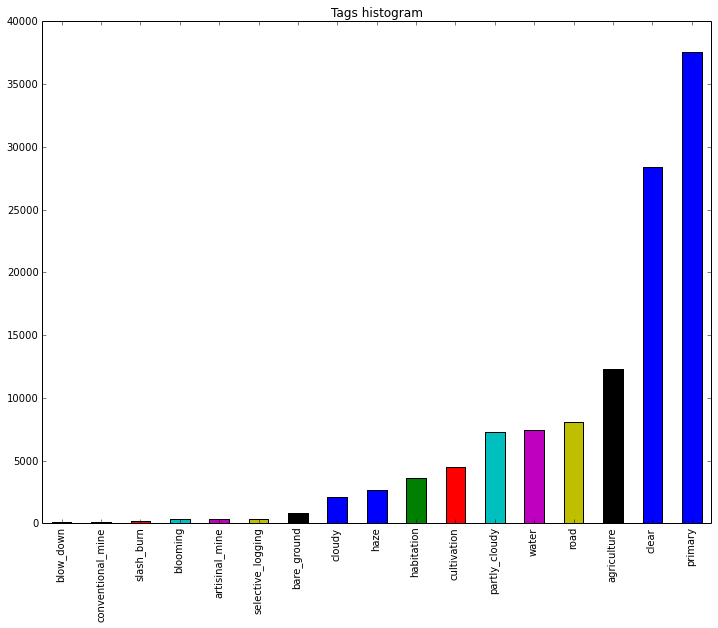

In [97]:
plt.figure(figsize=(12,9))
plt.title("Tags histogram")
df_train[label_list].sum().sort_values().plot.bar()

In [95]:
weather_labels = ['clear', 'partly_cloudy', 'haze', 'cloudy']
numeric_df = df_train[weather_labels]; 
c_matrix = numeric_df.T.dot(numeric_df)
        


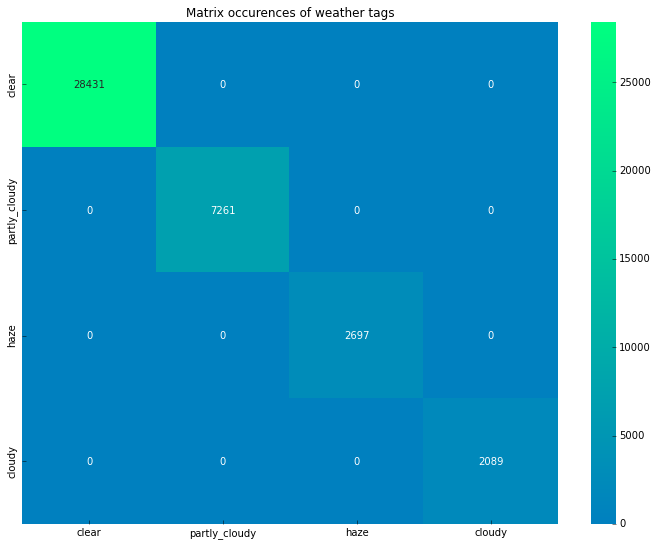

In [96]:
plt.figure(figsize=(12,9))
plt.title("Matrix occurences of weather tags")
ax = sns.heatmap(c_matrix,annot=True,cmap='winter', fmt="d",center=0)


In [79]:
not_weather_labels = []
for val in label_list:
    if val not in weather_labels:
        not_weather_labels.append(val)
print(not_weather_labels)

numeric_df = df_train[not_weather_labels]; 
c_matrix = numeric_df.T.dot(numeric_df)



['primary', 'agriculture', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']


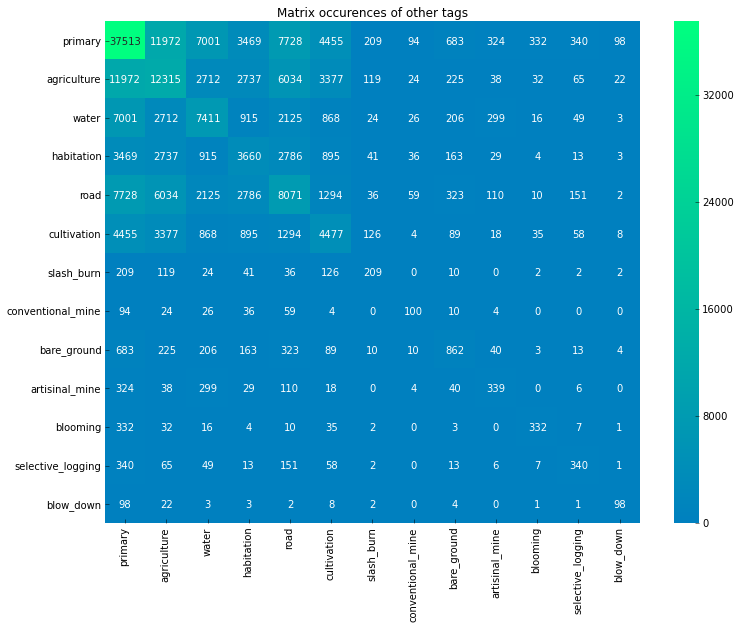

In [93]:
plt.figure(figsize=(12,9))
plt.title("Matrix occurences of other tags")
ax = sns.heatmap(c_matrix,cmap="winter",annot=True, fmt="d",center=0)
